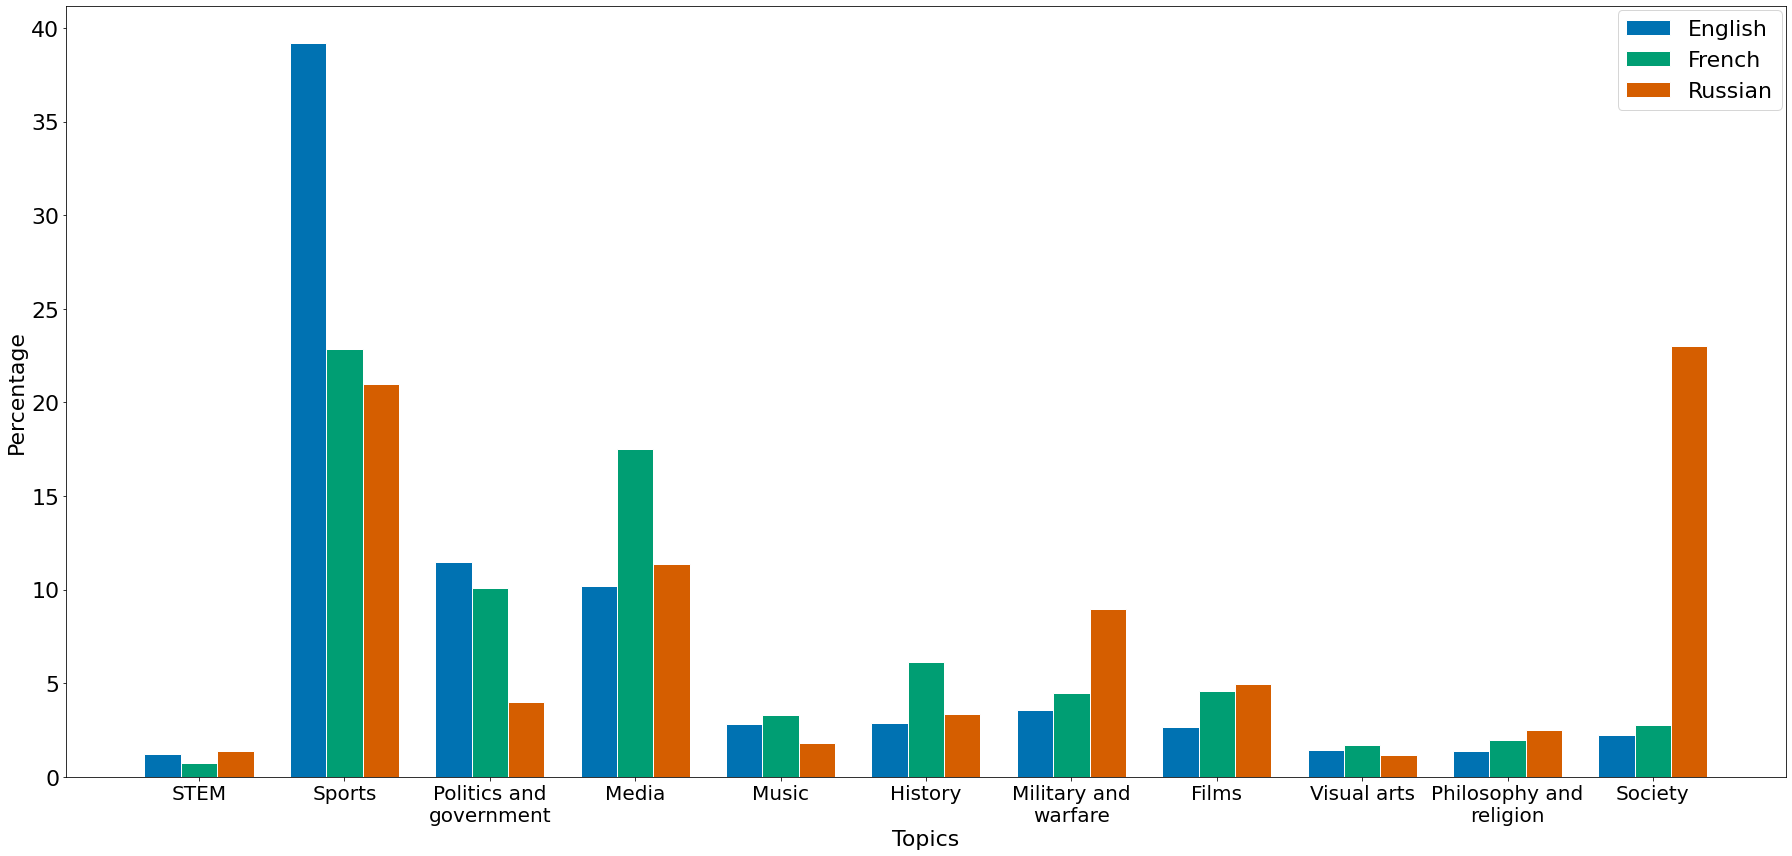

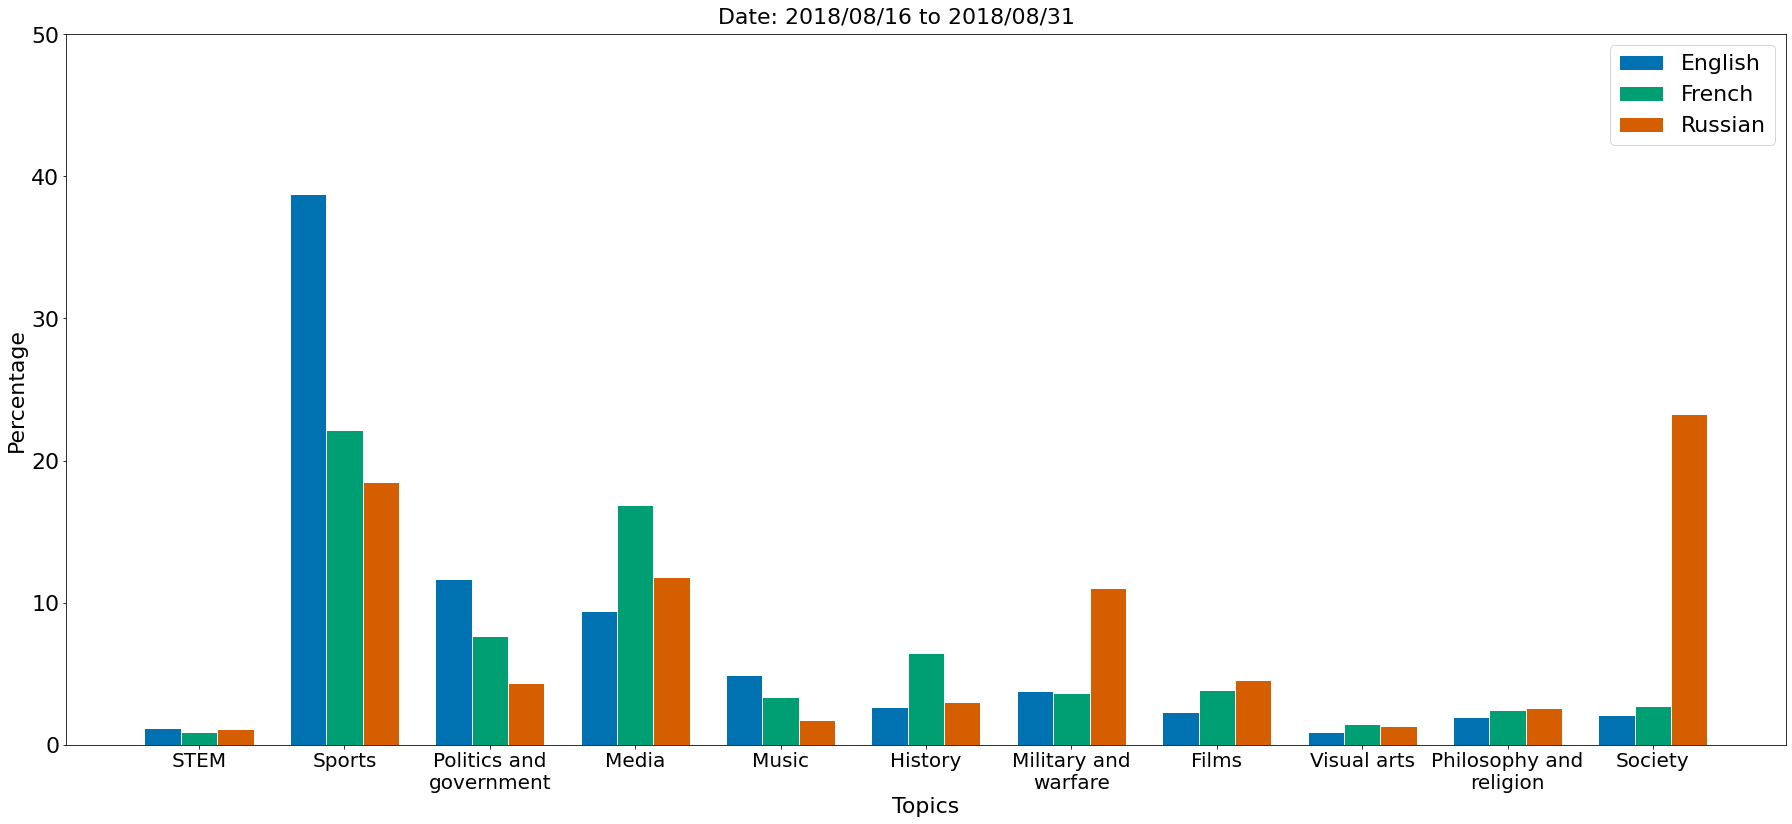

In [10]:
import IPython
import numpy as np
import networkx as nx
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
import time
import community
from fonctions import *
from pylab import rcParams


### Layout parameters
plt.style.use('seaborn-colorblind')
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['figure.figsize'] = 25, 12
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 22


### Variables for the following pipeline

pd.set_option('mode.chained_assignment', None)

path_en = 'Results/EN/EN_'
path_fr = 'Results/FR/FR_'
path_ru = 'Results/RU/RU_'

list_date = ['20180816_20180831', '20180901_20180915', '20180916_20180930', '20181001_20181015', 
            '20181016_20181031', '20181101_20181115',  '20181116_20181130', '20181201_20181215',
            '20181216_20181231']

# list_date = ['20191217_20191231', '20200101_20200115', '20200116_20200131', '20200201_20200215',
#              '20200216_20200229', '20200301_20200315', '20200316_20200331','20200401_20200415',
#              '20200416_20200430']

list_topic = ['STEM*', 'Sports', 'Politics_and_government', 'Media*', 'Music', 'History', 'Military_and_warfare',
             'Films', 'Visual_arts*', 'Philosophy_and_religion', 'Society']




def count_topics(date):
    
    count_en, count_fr, count_ru = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    

    df_en = pd.read_csv(path_en + date + '/list_cluster_topic.csv')
    df_fr = pd.read_csv(path_fr + date + '/list_cluster_topic.csv')
    df_ru = pd.read_csv(path_ru + date + '/list_cluster_topic.csv')

    count_en = df_en[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_fr = df_fr[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_ru = df_ru[['Subtopic', 'Count']].groupby('Subtopic').sum()

    count_en['Ratio'] = ((count_en['Count'] / count_en['Count'].sum()) * 100)
    count_fr['Ratio'] = ((count_fr['Count'] / count_fr['Count'].sum()) * 100)
    count_ru['Ratio'] = ((count_ru['Count'] / count_ru['Count'].sum()) * 100)

    return count_en.sort_values(by="Count", ascending=False), count_fr.sort_values(by="Count", ascending=False), count_ru.sort_values(by="Count", ascending=False)





def count_total_topics(list_date):
    
    count_en, count_fr, count_ru = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    
    for date in list_date:
            
        df_en = pd.read_csv(path_en + date + '/list_cluster_topic.csv')
        df_fr = pd.read_csv(path_fr + date + '/list_cluster_topic.csv')
        df_ru = pd.read_csv(path_ru + date + '/list_cluster_topic.csv')

        count_en = count_en.add(df_en[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)
        count_fr = count_fr.add(df_fr[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)
        count_ru = count_ru.add(df_ru[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)

    count_en['Ratio'] = ((count_en['Count'] / count_en['Count'].sum()) * 100)
    count_fr['Ratio'] = ((count_fr['Count'] / count_fr['Count'].sum()) * 100)
    count_ru['Ratio'] = ((count_ru['Count'] / count_ru['Count'].sum()) * 100)

    return count_en.sort_values(by="Count", ascending=False), count_fr.sort_values(by="Count", ascending=False), count_ru.sort_values(by="Count", ascending=False)
    

    

def display_topics_comparison(ratio_en, ratio_fr, ratio_ru, list_topic):
    fig = plt.figure()

    # set width of bar
    barWidth = 0.25

    # set height of bar
    bars_en, bars_fr, bars_ru = [], [], []

    for tp in list_topic:
        bars_en.append(list(ratio_en.loc[ratio_en.index.str.contains(tp)])[0])
        bars_fr.append(list(ratio_fr.loc[ratio_fr.index.str.contains(tp)])[0])
        bars_ru.append(list(ratio_ru.loc[ratio_ru.index.str.contains(tp)])[0])

    # Set position of bar on X axis
    r1 = np.arange(len(bars_en))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]


    
    plt.bar(r1, bars_en, width=barWidth, edgecolor='white', label='English')
    plt.bar(r2, bars_fr, width=barWidth, edgecolor='white', label='French')
    plt.bar(r3, bars_ru, width=barWidth, edgecolor='white', label='Russian')

    # Add xticks on the middle of the group bars
    
    
    
    # Making labels looks nicer
    l_topic = list_topic.copy()
    for i in range(len(l_topic)): 
        l_topic[i] = l_topic[i].replace("_", " ")
        if ('*' in l_topic[i]):
            l_topic[i] = l_topic[i].replace("*", "")
    l_topic[2]=l_topic[2][0:12] + '\n' + l_topic[2][13:]
    l_topic[6]=l_topic[6][0:12] + '\n' + l_topic[6][13:]
    l_topic[9]=l_topic[9][0:14] + '\n' + l_topic[9][15:]
    
    plt.xticks([r + barWidth for r in range(len(bars_en))], l_topic, rotation='horizontal')
    
    plt.xlabel('Topics', fontsize=22)
    plt.ylabel('Percentage', fontsize=22)
    
    
    fig.tight_layout()
    # Create legend & Show graphic
    fig.legend(fontsize=22)
    plt.show()
    fig.savefig("Figures_comparison/topic_distribution.pdf", bbox_inches='tight')
    
    

def barlist(n): 
    bars_en, bars_fr, bars_ru = [], [], []
    df_en, df_fr, df_ru = count_topics(list_date[n])
    for tp in list_topic:
        bars_en.append(list(df_en.loc[df_en.index.str.contains(tp), 'Ratio'].values)[0])
        bars_fr.append(list(df_fr.loc[df_fr.index.str.contains(tp), 'Ratio'].values)[0])
        bars_ru.append(list(df_ru.loc[df_ru.index.str.contains(tp), 'Ratio'].values)[0])
    return bars_en, bars_fr, bars_ru    
    
    
    
def topic_evolution(list_topic, list_date):
    fig= plt.figure()
    barWidth = 0.25
    
    ax=plt.axes()
    ax.set_ylim(0, 50)
    
    n=len(list_date) #Number of frames
    
    bar_en, bar_fr, bar_ru = barlist(0)
    
    r1=range(len(bar_en))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    
    barcollection_en = plt.bar(r1, bar_en, width=barWidth, edgecolor='white', label='English')
    barcollection_fr = plt.bar(r2, bar_fr, width=barWidth, edgecolor='white', label='French')
    barcollection_ru = plt.bar(r3, bar_ru, width=barWidth, edgecolor='white', label='Russian')
    
    # Making date more readable 
    date_title = []
    for date in list_date:
        date_title.append(date[0:4]+'/'+date[4:6]+'/'+date[6:8]+' to '+date[9:13]+'/'+date[13:15]+'/'+date[15:17])

    def animate(i):
        y_en, y_fr, y_ru = barlist(i)
        fig.suptitle('Date: ' + date_title[i], fontsize=22)
        for n, b in enumerate(barcollection_en):
            b.set_height(y_en[n])
        for n, b in enumerate(barcollection_fr):
            b.set_height(y_fr[n])
        for n, b in enumerate(barcollection_ru):
            b.set_height(y_ru[n])
        
    anim=FuncAnimation(fig, animate, repeat=True, blit=False, frames=n, interval=1000)
    
    # Making labels looks nicer
    l_topic = list_topic.copy()
    for i in range(len(l_topic)): 
        l_topic[i] = l_topic[i].replace("_", " ")
        if ('*' in l_topic[i]):
            l_topic[i] = l_topic[i].replace("*", "")
    l_topic[2]=l_topic[2][0:12] + '\n' + l_topic[2][13:]
    l_topic[6]=l_topic[6][0:12] + '\n' + l_topic[6][13:]
    l_topic[9]=l_topic[9][0:14] + '\n' + l_topic[9][15:]
    
    plt.xticks([r + barWidth for r in range(len(list_topic))], l_topic, rotation='horizontal')
    plt.xlabel('Topics', fontsize=22)
    plt.ylabel('Percentage', fontsize=22)
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.legend(fontsize=22)
    plt.show()
    anim.save('Figures_comparison/bar.gif', writer='pillow')
    

    


    
count_en, count_fr, count_ru = count_total_topics(list_date)

display_topics_comparison(count_en['Ratio'], count_fr['Ratio'], count_ru['Ratio'], list_topic)

topic_evolution(list_topic, list_date)    

<Figure size 1800x864 with 0 Axes>

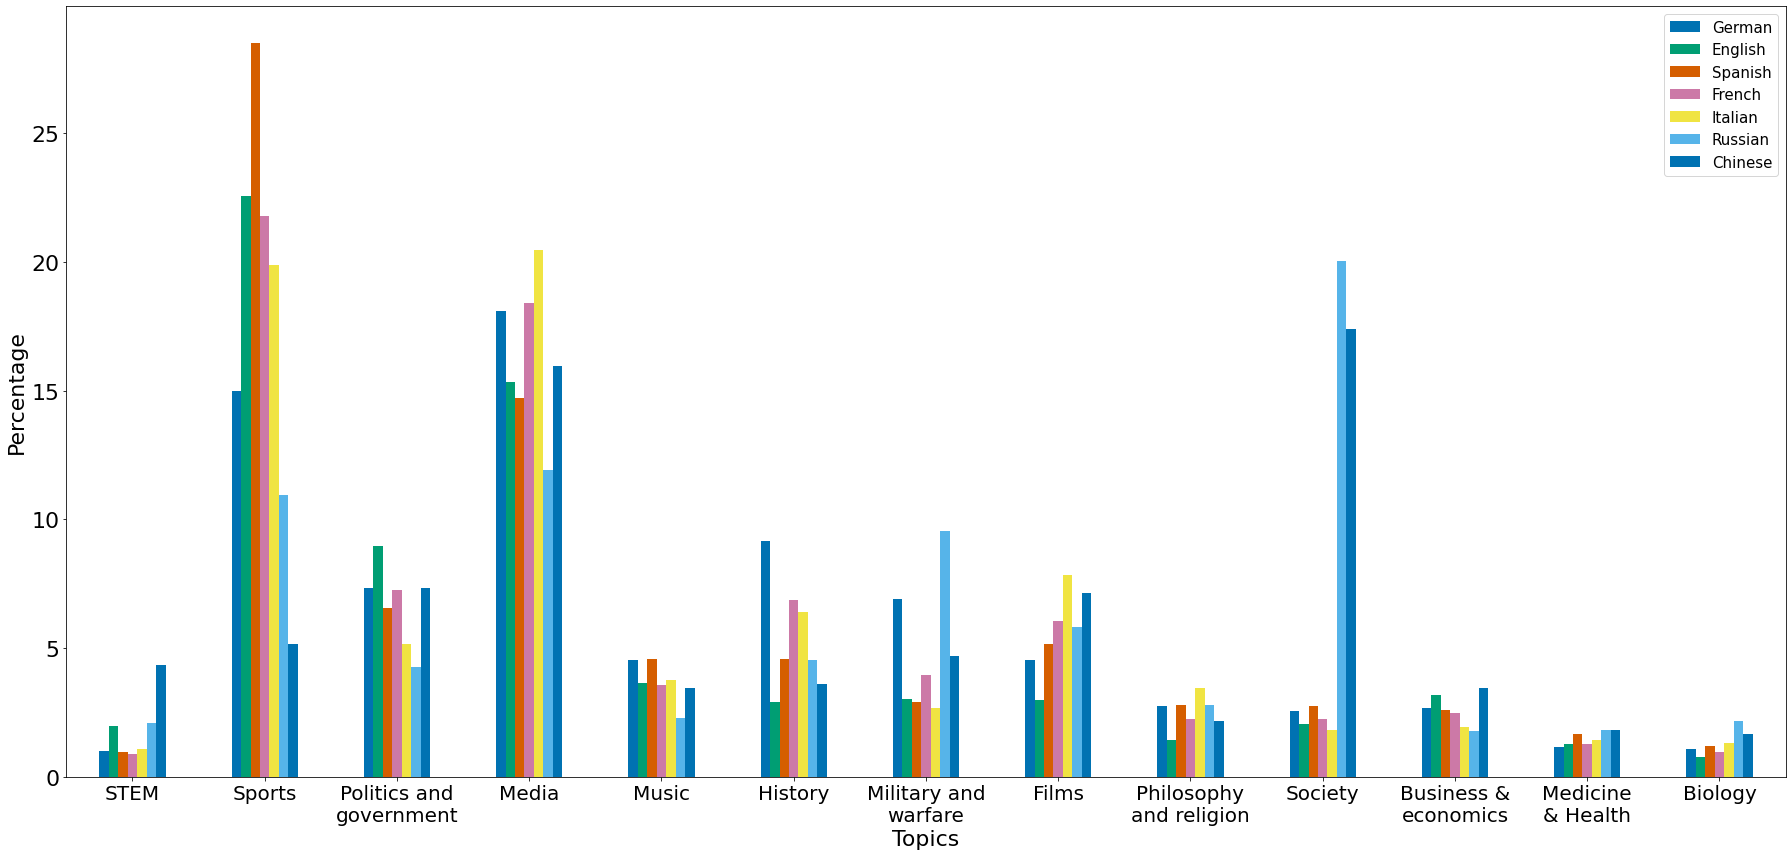

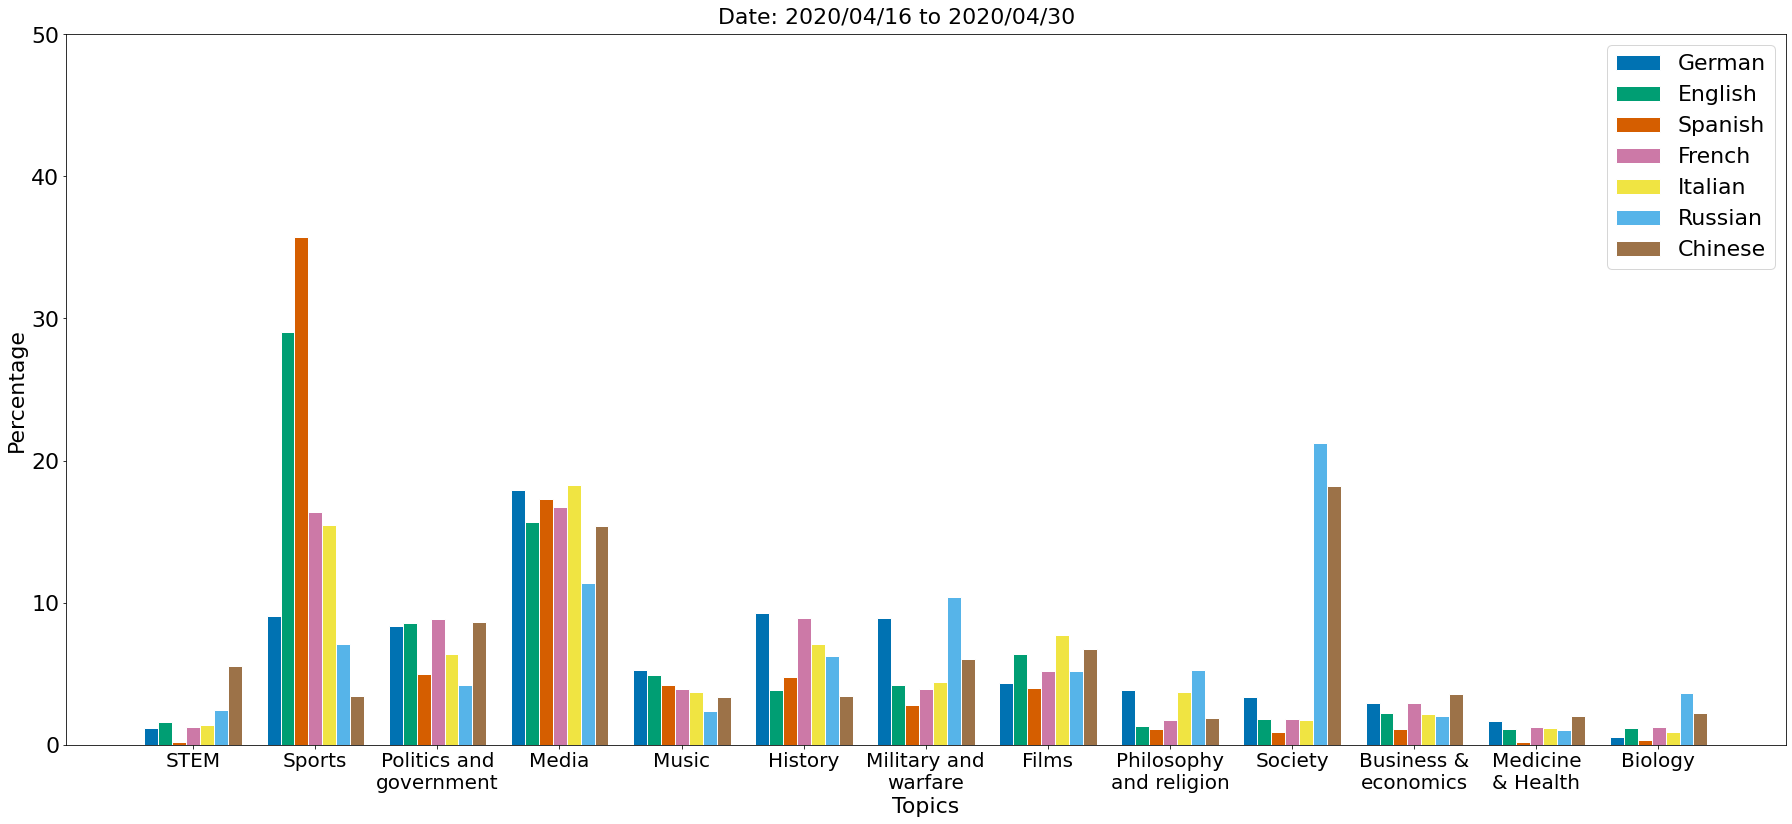

In [28]:
import IPython
import numpy as np
import networkx as nx
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
import time
import community
from fonctions import *
from pylab import rcParams
import seaborn as sns
from celluloid import Camera

### Layout parameters
sns.set_palette(palette='colorblind', n_colors=8) 
plt.style.use('seaborn-colorblind')
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['figure.figsize'] = 25, 12
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 22

# pd.options.plotting.backend = 'matplotlib'

### Variables for the following pipeline

pd.set_option('mode.chained_assignment', None)

path_de = 'Results/DE/DE_'
path_en = 'Results/EN/EN_'
path_es = 'Results/ES/ES_'
path_fr = 'Results/FR/FR_'
path_it = 'Results/IT/IT_'
path_ru = 'Results/RU/RU_'
path_zh = 'Results/ZH/ZH_'





list_date = ['20191217_20191231', '20200101_20200115', '20200116_20200131', '20200201_20200215',
             '20200216_20200229', '20200301_20200315', '20200316_20200331','20200401_20200415',
             '20200416_20200430']


list_topic = ['STEM*', 'Sports', 'Politics_and_government', 'Media*', 'Music', 'History', 'Military_and_warfare',
             'Films', 'Philosophy_and_religion', 'Society', 'Business_and_economics', 'Medicine_&_Health', 'Biology']




def count_topics(date):
    
    count_de,count_en, count_es,count_fr,count_it,count_ru,count_zh = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
    
    df_de = pd.read_csv(path_de + date + '/list_cluster_topic.csv')
    df_en = pd.read_csv(path_en + date + '/list_cluster_topic.csv')
    df_es = pd.read_csv(path_es + date + '/list_cluster_topic.csv')
    df_fr = pd.read_csv(path_fr + date + '/list_cluster_topic.csv')
    df_it = pd.read_csv(path_it + date + '/list_cluster_topic.csv')
    df_ru = pd.read_csv(path_ru + date + '/list_cluster_topic.csv')
    df_zh = pd.read_csv(path_zh + date + '/list_cluster_topic.csv')

    count_de = df_de[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_en = df_en[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_es = df_es[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_fr = df_fr[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_it = df_it[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_ru = df_ru[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_zh = df_zh[['Subtopic', 'Count']].groupby('Subtopic').sum()

    count_de['Ratio'] = ((count_de['Count'] / count_de['Count'].sum()) * 100)
    count_en['Ratio'] = ((count_en['Count'] / count_en['Count'].sum()) * 100)
    count_es['Ratio'] = ((count_es['Count'] / count_es['Count'].sum()) * 100)
    count_fr['Ratio'] = ((count_fr['Count'] / count_fr['Count'].sum()) * 100)
    count_it['Ratio'] = ((count_it['Count'] / count_it['Count'].sum()) * 100)
    count_ru['Ratio'] = ((count_ru['Count'] / count_ru['Count'].sum()) * 100)
    count_zh['Ratio'] = ((count_zh['Count'] / count_zh['Count'].sum()) * 100)
    
    count_de.sort_values(by="Count", ascending=False, inplace=True)
    count_en.sort_values(by="Count", ascending=False, inplace=True)
    count_es.sort_values(by="Count", ascending=False, inplace=True)
    count_fr.sort_values(by="Count", ascending=False, inplace=True)
    count_it.sort_values(by="Count", ascending=False, inplace=True)
    count_ru.sort_values(by="Count", ascending=False, inplace=True)
    count_zh.sort_values(by="Count", ascending=False, inplace=True)

    return count_de, count_en, count_es, count_fr, count_it, count_ru, count_zh





def count_total_topics(list_date):
    
    count_de,count_en, count_es,count_fr,count_it,count_ru,count_zh = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
    
    for date in list_date:
            
        df_de = pd.read_csv(path_de + date + '/list_cluster_topic.csv')
        df_en = pd.read_csv(path_en + date + '/list_cluster_topic.csv')
        df_es = pd.read_csv(path_es + date + '/list_cluster_topic.csv')
        df_fr = pd.read_csv(path_fr + date + '/list_cluster_topic.csv')
        df_it = pd.read_csv(path_it + date + '/list_cluster_topic.csv')
        df_ru = pd.read_csv(path_ru + date + '/list_cluster_topic.csv')
        df_zh = pd.read_csv(path_zh + date + '/list_cluster_topic.csv')
        
        count_de = count_de.add(df_de[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)
        count_en = count_en.add(df_en[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)
        count_es = count_es.add(df_es[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)
        count_fr = count_fr.add(df_fr[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)    
        count_it = count_it.add(df_it[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)
        count_ru = count_ru.add(df_ru[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)
        count_zh = count_zh.add(df_zh[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)

    count_de['Ratio'] = ((count_de['Count'] / count_de['Count'].sum()) * 100)
    count_en['Ratio'] = ((count_en['Count'] / count_en['Count'].sum()) * 100)
    count_es['Ratio'] = ((count_es['Count'] / count_es['Count'].sum()) * 100)
    count_fr['Ratio'] = ((count_fr['Count'] / count_fr['Count'].sum()) * 100)
    count_it['Ratio'] = ((count_it['Count'] / count_it['Count'].sum()) * 100)
    count_ru['Ratio'] = ((count_ru['Count'] / count_ru['Count'].sum()) * 100)
    count_zh['Ratio'] = ((count_zh['Count'] / count_zh['Count'].sum()) * 100)
    
    count_de.sort_values(by="Count", ascending=False, inplace=True)
    count_en.sort_values(by="Count", ascending=False, inplace=True)
    count_es.sort_values(by="Count", ascending=False, inplace=True)
    count_fr.sort_values(by="Count", ascending=False, inplace=True)
    count_it.sort_values(by="Count", ascending=False, inplace=True)
    count_ru.sort_values(by="Count", ascending=False, inplace=True)
    count_zh.sort_values(by="Count", ascending=False, inplace=True)

    return count_de, count_en, count_es, count_fr, count_it, count_ru, count_zh
    

    

def display_topics_comparison(ratio_de, ratio_en, ratio_es, ratio_fr, ratio_it, ratio_ru, ratio_zh, list_topic):
    fig = plt.figure()

    # set width of bar
    barWidth = 0.25

    # set height of bar
    bars_de, bars_en, bars_es, bars_fr, bars_it, bars_ru, bars_zh = [], [], [], [], [], [], []

    for tp in list_topic:
        bars_de.append(list(ratio_de.loc[ratio_de.index.str.contains(tp)])[0])
        bars_en.append(list(ratio_en.loc[ratio_en.index.str.contains(tp)])[0])
        bars_es.append(list(ratio_es.loc[ratio_es.index.str.contains(tp)])[0])
        bars_fr.append(list(ratio_fr.loc[ratio_fr.index.str.contains(tp)])[0])
        bars_it.append(list(ratio_it.loc[ratio_it.index.str.contains(tp)])[0])
        bars_ru.append(list(ratio_ru.loc[ratio_ru.index.str.contains(tp)])[0])
        bars_zh.append(list(ratio_zh.loc[ratio_zh.index.str.contains(tp)])[0])

    
    # Making labels looks nicer
    l_topic = list_topic.copy()
    for i in range(len(l_topic)): 
        l_topic[i] = l_topic[i].replace("_", " ")
        if ('*' in l_topic[i]):
            l_topic[i] = l_topic[i].replace("*", "")
    l_topic[2]=l_topic[2][0:12] + '\n' + l_topic[2][13:]
    l_topic[6]=l_topic[6][0:12] + '\n' + l_topic[6][13:]
    l_topic[8]=l_topic[8][0:10] + '\n' + l_topic[8][11:]
    l_topic[10]=l_topic[10][0:9] +'&'+ '\n' + l_topic[10][13:]
    l_topic[11]=l_topic[11][0:8] + '\n' + l_topic[11][9:]
    
    plotdata = pd.DataFrame({"German":bars_de,"English":bars_en,"Spanish":bars_es,"French":bars_fr,
                             "Italian":bars_it,"Russian":bars_ru,"Chinese":bars_zh,}, index=l_topic)
    pd_plot = plotdata.plot(kind="bar", rot=0)
    fig = pd_plot.get_figure()
    
    plt.xlabel('Topics', fontsize=22)
    plt.ylabel('Percentage', fontsize=22)
    
    
    fig.tight_layout()
    # Create legend & Show graphic
    plt.legend(fontsize=15)
    plt.show()
    fig.savefig("Figures_comparison/topic_distribution_2.png", bbox_inches='tight')
    
    
    return bars_de, bars_en, bars_es, bars_fr, bars_it, bars_ru, bars_zh
    

def barlist(n): 
    bars_de, bars_en, bars_es, bars_fr, bars_it, bars_ru, bars_zh = [], [], [], [], [], [], []
    df_de, df_en, df_es, df_fr, df_it, df_ru, df_zh = count_topics(list_date[n])
    for tp in list_topic:
        try:
            bars_de.append(list(df_de.loc[df_de.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_de.append(0)
        try:
            bars_en.append(list(df_en.loc[df_en.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_en.append(0)
        try:
            bars_es.append(list(df_es.loc[df_es.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_es.append(0)
        try:
            bars_fr.append(list(df_fr.loc[df_fr.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_fr.append(0)
        try:
            bars_it.append(list(df_it.loc[df_it.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_it.append(0)
        try:
            bars_ru.append(list(df_ru.loc[df_ru.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_ru.append(0)
        try:
            bars_zh.append(list(df_zh.loc[df_zh.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_zh.append(0)

    return bars_de, bars_en, bars_es, bars_fr, bars_it, bars_ru, bars_zh
    
    
    
def topic_evolution(list_topic, list_date):
    
    # Making labels looks nicer
    l_topic = list_topic.copy()
    for i in range(len(l_topic)): 
        l_topic[i] = l_topic[i].replace("_", " ")
        if ('*' in l_topic[i]):
            l_topic[i] = l_topic[i].replace("*", "")
    l_topic[2]=l_topic[2][0:12] + '\n' + l_topic[2][13:]
    l_topic[6]=l_topic[6][0:12] + '\n' + l_topic[6][13:]
    l_topic[8]=l_topic[8][0:10] + '\n' + l_topic[8][11:]
    l_topic[10]=l_topic[10][0:9] +'&'+ '\n' + l_topic[10][13:]
    l_topic[11]=l_topic[11][0:8] + '\n' + l_topic[11][9:]
    
    # Making date more readable 
    date_title = []
    for date in list_date:
        date_title.append(date[0:4]+'/'+date[4:6]+'/'+date[6:8]+' to '+date[9:13]+'/'+date[13:15]+'/'+date[15:17])
    
    
    
    fig, ax = plt.subplots()
    barWidth = 0.25
    
    
    total_width=0.8
    single_width=1
    n_bars = 7
    bar_width = total_width / n_bars
    x_offset=[]
    for i in range(n_bars):
        x_offset.append((i - n_bars / 2) * bar_width + 2.7*bar_width)
    
    
    ax.set_ylim(0, 50)
    
    n=len(list_date) #Number of frames
    
    bars_de, bars_en, bars_es, bars_fr, bars_it, bars_ru, bars_zh = barlist(0)
    
    r = np.arange(len(bars_en))
    r1 = [x + x_offset[0] for x in r]
    r2 = [x + x_offset[1] for x in r]
    r3 = [x + x_offset[2] for x in r]
    r4 = [x + x_offset[3] for x in r]
    r5 = [x + x_offset[4] for x in r]
    r6 = [x + x_offset[5] for x in r]
    r7 = [x + x_offset[6] for x in r]
    
    barcollection_de = plt.bar(r1, bars_de, width=bar_width*single_width, edgecolor='white', label='German', align='center')
    barcollection_en = plt.bar(r2, bars_en, width=bar_width*single_width, edgecolor='white', label='English', align='center')
    barcollection_es = plt.bar(r3, bars_es, width=bar_width*single_width, edgecolor='white', label='Spanish', align='center')
    barcollection_fr = plt.bar(r4, bars_fr, width=bar_width*single_width, edgecolor='white', label='French', align='center')
    barcollection_it = plt.bar(r5, bars_it, width=bar_width*single_width, edgecolor='white', label='Italian', align='center')
    barcollection_ru = plt.bar(r6, bars_ru, width=bar_width*single_width, edgecolor='white', label='Russian', align='center')
    barcollection_zh = plt.bar(r7, bars_zh, width=bar_width*single_width, color='#9c7248',edgecolor='white', label='Chinese', align='center')
    
    def animate(i):
        y_de, y_en, y_es, y_fr, y_it, y_ru, y_zh = barlist(i)
        fig.suptitle('Date: ' + date_title[i], fontsize=22)
        for n, b in enumerate(barcollection_de):
            b.set_height(y_de[n])
        for n, b in enumerate(barcollection_en):
            b.set_height(y_en[n])
        for n, b in enumerate(barcollection_es):
            b.set_height(y_es[n])
        for n, b in enumerate(barcollection_fr):
            b.set_height(y_fr[n])
        for n, b in enumerate(barcollection_it):
            b.set_height(y_it[n])
        for n, b in enumerate(barcollection_ru):
            b.set_height(y_ru[n])
        for n, b in enumerate(barcollection_zh):
            b.set_height(y_zh[n])
        
        
        
    anim=FuncAnimation(fig, animate, init_func=None, repeat=True, blit=False, frames=n, interval=1000)
    
    plt.xticks([r + barWidth for r in range(len(list_topic))], l_topic, rotation='horizontal')
    plt.xlabel('Topics', fontsize=22)
    plt.ylabel('Percentage', fontsize=22)
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.legend(fontsize=22)
    anim.save('Figures_comparison/bar_2.gif', writer='pillow')
 
    


    
count_de, count_en, count_es, count_fr, count_it, count_ru, count_zh = count_total_topics(list_date)

bars_de, bars_en, bars_es, bars_fr, bars_it, bars_ru, bars_zh=display_topics_comparison(count_de['Ratio'],count_en['Ratio'],count_es['Ratio'],count_fr['Ratio'],count_it['Ratio'],count_ru['Ratio'],count_zh['Ratio'],list_topic)

topic_evolution(list_topic, list_date) 

In [17]:
total_count = pd.DataFrame(columns=['Count', 'Ratio'])
total_count['Count'] = total_count['Count'].add(count_de['Count'], fill_value=0)
total_count['Count'] = total_count['Count'].add(count_en['Count'], fill_value=0)
total_count['Count'] = total_count['Count'].add(count_es['Count'], fill_value=0)
total_count['Count'] = total_count['Count'].add(count_fr['Count'], fill_value=0)
total_count['Count'] = total_count['Count'].add(count_it['Count'], fill_value=0)
total_count['Count'] = total_count['Count'].add(count_ru['Count'], fill_value=0)
total_count['Count'] = total_count['Count'].add(count_zh['Count'], fill_value=0)
total_count['Ratio'] = (total_count['Count'] / total_count['Count'].sum()) * 100
                              
print("Topics by popularity")                          
total_count.sort_values(by='Count', ascending=False)


Topics by popularity


17.32443529571202

<Figure size 1800x864 with 0 Axes>

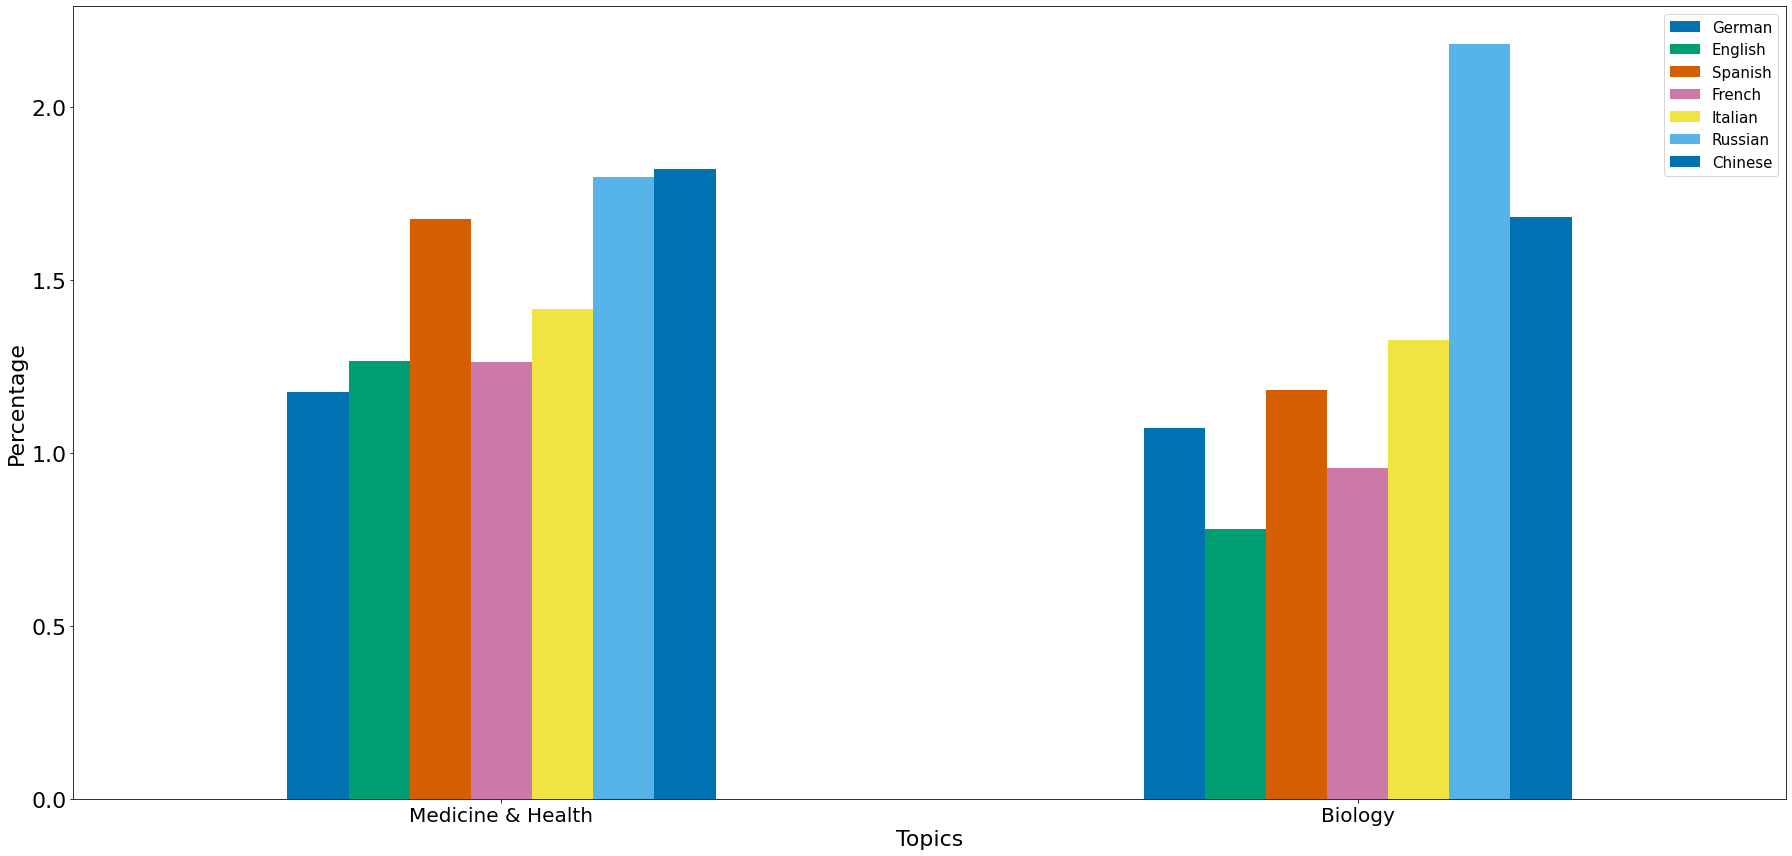

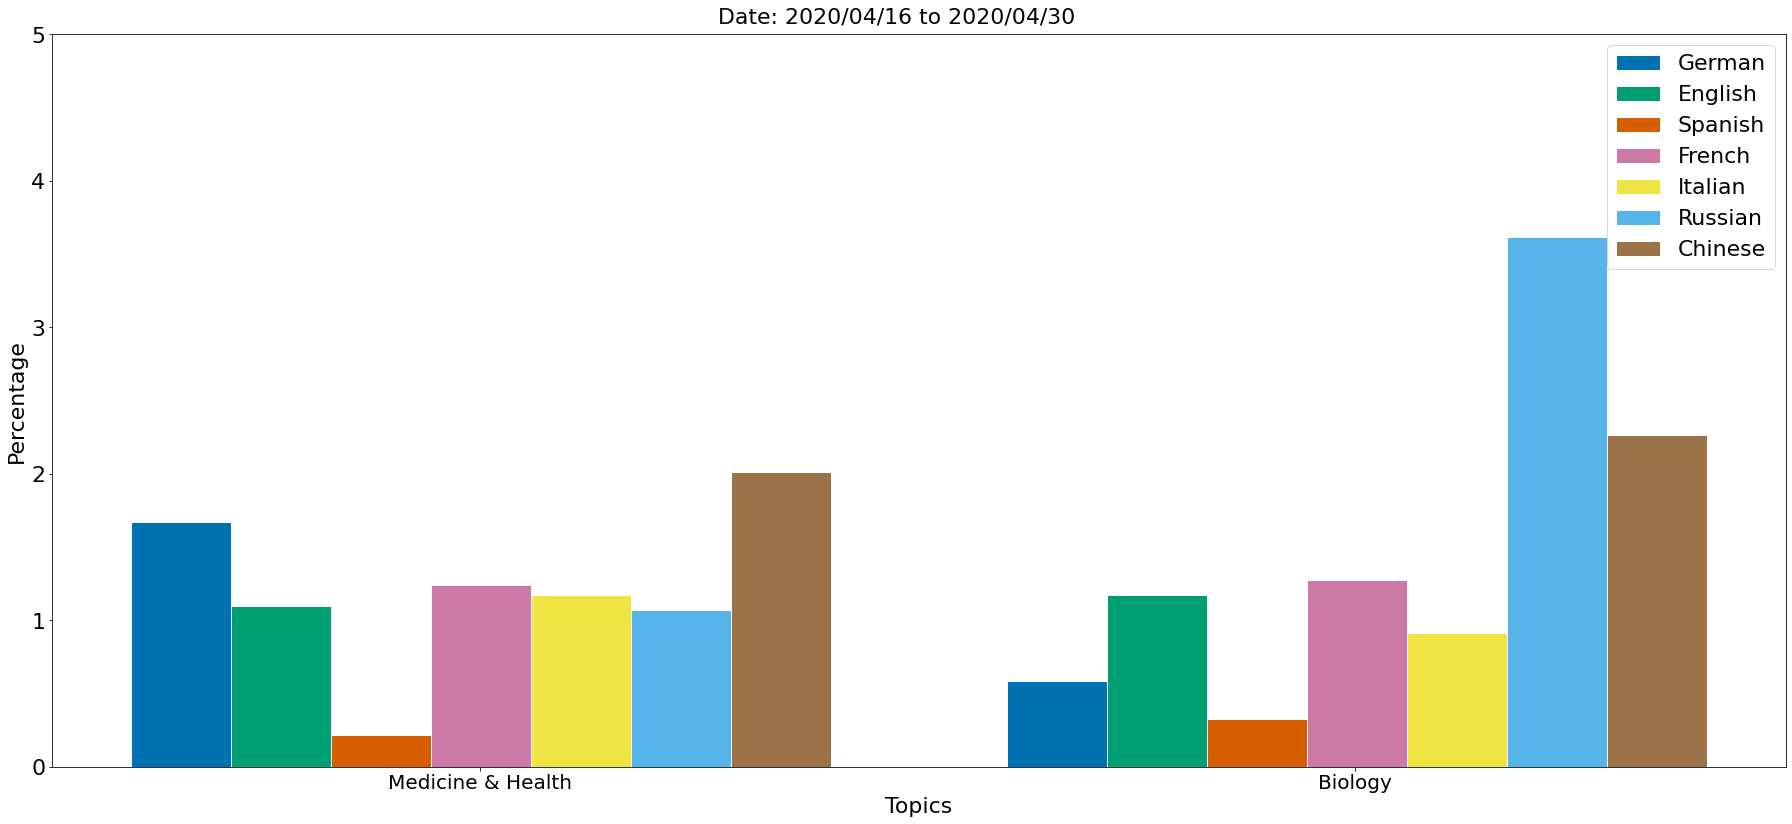

In [2]:
import IPython
import numpy as np
import networkx as nx
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
import time
import community
from fonctions import *
from pylab import rcParams
import seaborn as sns
from celluloid import Camera

### Layout parameters
sns.set_palette(palette='colorblind', n_colors=8) 
plt.style.use('seaborn-colorblind')
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['figure.figsize'] = 25, 12
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 22

# pd.options.plotting.backend = 'matplotlib'

### Variables for the following pipeline

pd.set_option('mode.chained_assignment', None)

path_de = 'Results/DE/DE_'
path_en = 'Results/EN/EN_'
path_es = 'Results/ES/ES_'
path_fr = 'Results/FR/FR_'
path_it = 'Results/IT/IT_'
path_ru = 'Results/RU/RU_'
path_zh = 'Results/ZH/ZH_'





list_date = ['20191217_20191231', '20200101_20200115', '20200116_20200131', '20200201_20200215',
             '20200216_20200229', '20200301_20200315', '20200316_20200331','20200401_20200415',
             '20200416_20200430']


list_topic = ['Medicine_&_Health', 'Biology']




def count_topics(date):
    
    count_de,count_en, count_es,count_fr,count_it,count_ru,count_zh = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
    
    df_de = pd.read_csv(path_de + date + '/list_cluster_topic.csv')
    df_en = pd.read_csv(path_en + date + '/list_cluster_topic.csv')
    df_es = pd.read_csv(path_es + date + '/list_cluster_topic.csv')
    df_fr = pd.read_csv(path_fr + date + '/list_cluster_topic.csv')
    df_it = pd.read_csv(path_it + date + '/list_cluster_topic.csv')
    df_ru = pd.read_csv(path_ru + date + '/list_cluster_topic.csv')
    df_zh = pd.read_csv(path_zh + date + '/list_cluster_topic.csv')

    count_de = df_de[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_en = df_en[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_es = df_es[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_fr = df_fr[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_it = df_it[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_ru = df_ru[['Subtopic', 'Count']].groupby('Subtopic').sum()
    count_zh = df_zh[['Subtopic', 'Count']].groupby('Subtopic').sum()

    count_de['Ratio'] = ((count_de['Count'] / count_de['Count'].sum()) * 100)
    count_en['Ratio'] = ((count_en['Count'] / count_en['Count'].sum()) * 100)
    count_es['Ratio'] = ((count_es['Count'] / count_es['Count'].sum()) * 100)
    count_fr['Ratio'] = ((count_fr['Count'] / count_fr['Count'].sum()) * 100)
    count_it['Ratio'] = ((count_it['Count'] / count_it['Count'].sum()) * 100)
    count_ru['Ratio'] = ((count_ru['Count'] / count_ru['Count'].sum()) * 100)
    count_zh['Ratio'] = ((count_zh['Count'] / count_zh['Count'].sum()) * 100)
    
    count_de.sort_values(by="Count", ascending=False, inplace=True)
    count_en.sort_values(by="Count", ascending=False, inplace=True)
    count_es.sort_values(by="Count", ascending=False, inplace=True)
    count_fr.sort_values(by="Count", ascending=False, inplace=True)
    count_it.sort_values(by="Count", ascending=False, inplace=True)
    count_ru.sort_values(by="Count", ascending=False, inplace=True)
    count_zh.sort_values(by="Count", ascending=False, inplace=True)

    return count_de, count_en, count_es, count_fr, count_it, count_ru, count_zh





def count_total_topics(list_date):
    
    count_de,count_en, count_es,count_fr,count_it,count_ru,count_zh = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
    
    for date in list_date:
            
        df_de = pd.read_csv(path_de + date + '/list_cluster_topic.csv')
        df_en = pd.read_csv(path_en + date + '/list_cluster_topic.csv')
        df_es = pd.read_csv(path_es + date + '/list_cluster_topic.csv')
        df_fr = pd.read_csv(path_fr + date + '/list_cluster_topic.csv')
        df_it = pd.read_csv(path_it + date + '/list_cluster_topic.csv')
        df_ru = pd.read_csv(path_ru + date + '/list_cluster_topic.csv')
        df_zh = pd.read_csv(path_zh + date + '/list_cluster_topic.csv')
        
        count_de = count_de.add(df_de[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)
        count_en = count_en.add(df_en[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)
        count_es = count_es.add(df_es[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)
        count_fr = count_fr.add(df_fr[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)    
        count_it = count_it.add(df_it[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)
        count_ru = count_ru.add(df_ru[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)
        count_zh = count_zh.add(df_zh[['Subtopic', 'Count']].groupby('Subtopic').sum(), fill_value=0)

    count_de['Ratio'] = ((count_de['Count'] / count_de['Count'].sum()) * 100)
    count_en['Ratio'] = ((count_en['Count'] / count_en['Count'].sum()) * 100)
    count_es['Ratio'] = ((count_es['Count'] / count_es['Count'].sum()) * 100)
    count_fr['Ratio'] = ((count_fr['Count'] / count_fr['Count'].sum()) * 100)
    count_it['Ratio'] = ((count_it['Count'] / count_it['Count'].sum()) * 100)
    count_ru['Ratio'] = ((count_ru['Count'] / count_ru['Count'].sum()) * 100)
    count_zh['Ratio'] = ((count_zh['Count'] / count_zh['Count'].sum()) * 100)
    
    count_de.sort_values(by="Count", ascending=False, inplace=True)
    count_en.sort_values(by="Count", ascending=False, inplace=True)
    count_es.sort_values(by="Count", ascending=False, inplace=True)
    count_fr.sort_values(by="Count", ascending=False, inplace=True)
    count_it.sort_values(by="Count", ascending=False, inplace=True)
    count_ru.sort_values(by="Count", ascending=False, inplace=True)
    count_zh.sort_values(by="Count", ascending=False, inplace=True)

    return count_de, count_en, count_es, count_fr, count_it, count_ru, count_zh
    

    

def display_topics_comparison(ratio_de, ratio_en, ratio_es, ratio_fr, ratio_it, ratio_ru, ratio_zh, list_topic):
    fig = plt.figure()

    # set width of bar
    barWidth = 0.25

    # set height of bar
    bars_de, bars_en, bars_es, bars_fr, bars_it, bars_ru, bars_zh = [], [], [], [], [], [], []

    for tp in list_topic:
        bars_de.append(list(ratio_de.loc[ratio_de.index.str.contains(tp)])[0])
        bars_en.append(list(ratio_en.loc[ratio_en.index.str.contains(tp)])[0])
        bars_es.append(list(ratio_es.loc[ratio_es.index.str.contains(tp)])[0])
        bars_fr.append(list(ratio_fr.loc[ratio_fr.index.str.contains(tp)])[0])
        bars_it.append(list(ratio_it.loc[ratio_it.index.str.contains(tp)])[0])
        bars_ru.append(list(ratio_ru.loc[ratio_ru.index.str.contains(tp)])[0])
        bars_zh.append(list(ratio_zh.loc[ratio_zh.index.str.contains(tp)])[0])

    
    # Making labels looks nicer
    l_topic = list_topic.copy()
    for i in range(len(l_topic)): 
        l_topic[i] = l_topic[i].replace("_", " ")
        if ('*' in l_topic[i]):
            l_topic[i] = l_topic[i].replace("*", "")
    
    plotdata = pd.DataFrame({"German":bars_de,"English":bars_en,"Spanish":bars_es,"French":bars_fr,
                             "Italian":bars_it,"Russian":bars_ru,"Chinese":bars_zh,}, index=l_topic)
    pd_plot = plotdata.plot(kind="bar", rot=0)
    fig = pd_plot.get_figure()
    
    plt.xlabel('Topics', fontsize=22)
    plt.ylabel('Percentage', fontsize=22)
    
    
    fig.tight_layout()
    # Create legend & Show graphic
    plt.legend(fontsize=15)
    plt.show()
    fig.savefig("Figures_comparison/topic_distribution_medicine.png", bbox_inches='tight')
    
    
    return bars_de, bars_en, bars_es, bars_fr, bars_it, bars_ru, bars_zh
    

def barlist(n): 
    bars_de, bars_en, bars_es, bars_fr, bars_it, bars_ru, bars_zh = [], [], [], [], [], [], []
    df_de, df_en, df_es, df_fr, df_it, df_ru, df_zh = count_topics(list_date[n])
    for tp in list_topic:
        try:
            bars_de.append(list(df_de.loc[df_de.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_de.append(0)
        try:
            bars_en.append(list(df_en.loc[df_en.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_en.append(0)
        try:
            bars_es.append(list(df_es.loc[df_es.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_es.append(0)
        try:
            bars_fr.append(list(df_fr.loc[df_fr.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_fr.append(0)
        try:
            bars_it.append(list(df_it.loc[df_it.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_it.append(0)
        try:
            bars_ru.append(list(df_ru.loc[df_ru.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_ru.append(0)
        try:
            bars_zh.append(list(df_zh.loc[df_zh.index.str.contains(tp), 'Ratio'].values)[0])
        except (IndexError):
            bars_zh.append(0)

    return bars_de, bars_en, bars_es, bars_fr, bars_it, bars_ru, bars_zh
    
    
    
def topic_evolution(list_topic, list_date):
    
    # Making labels looks nicer
    l_topic = list_topic.copy()
    for i in range(len(l_topic)): 
        l_topic[i] = l_topic[i].replace("_", " ")
        if ('*' in l_topic[i]):
            l_topic[i] = l_topic[i].replace("*", "")
  
    
    # Making date more readable 
    date_title = []
    for date in list_date:
        date_title.append(date[0:4]+'/'+date[4:6]+'/'+date[6:8]+' to '+date[9:13]+'/'+date[13:15]+'/'+date[15:17])
    
    
    
    fig, ax = plt.subplots()
    barWidth = 0.25
    
    
    total_width=0.8
    single_width=1
    n_bars = 7
    bar_width = total_width / n_bars
    x_offset=[]
    for i in range(n_bars):
        x_offset.append((i - n_bars / 2) * bar_width + 2.7*bar_width)
    
    
    ax.set_ylim(0, 5)
    
    n=len(list_date) #Number of frames
    
    bars_de, bars_en, bars_es, bars_fr, bars_it, bars_ru, bars_zh = barlist(0)
    
    r = np.arange(len(bars_en))
    r1 = [x + x_offset[0] for x in r]
    r2 = [x + x_offset[1] for x in r]
    r3 = [x + x_offset[2] for x in r]
    r4 = [x + x_offset[3] for x in r]
    r5 = [x + x_offset[4] for x in r]
    r6 = [x + x_offset[5] for x in r]
    r7 = [x + x_offset[6] for x in r]
    
    barcollection_de = plt.bar(r1, bars_de, width=bar_width*single_width, edgecolor='white', label='German', align='center')
    barcollection_en = plt.bar(r2, bars_en, width=bar_width*single_width, edgecolor='white', label='English', align='center')
    barcollection_es = plt.bar(r3, bars_es, width=bar_width*single_width, edgecolor='white', label='Spanish', align='center')
    barcollection_fr = plt.bar(r4, bars_fr, width=bar_width*single_width, edgecolor='white', label='French', align='center')
    barcollection_it = plt.bar(r5, bars_it, width=bar_width*single_width, edgecolor='white', label='Italian', align='center')
    barcollection_ru = plt.bar(r6, bars_ru, width=bar_width*single_width, edgecolor='white', label='Russian', align='center')
    barcollection_zh = plt.bar(r7, bars_zh, width=bar_width*single_width, color='#9c7248',edgecolor='white', label='Chinese', align='center')
    
    def animate(i):
        y_de, y_en, y_es, y_fr, y_it, y_ru, y_zh = barlist(i)
        fig.suptitle('Date: ' + date_title[i], fontsize=22)
        for n, b in enumerate(barcollection_de):
            b.set_height(y_de[n])
        for n, b in enumerate(barcollection_en):
            b.set_height(y_en[n])
        for n, b in enumerate(barcollection_es):
            b.set_height(y_es[n])
        for n, b in enumerate(barcollection_fr):
            b.set_height(y_fr[n])
        for n, b in enumerate(barcollection_it):
            b.set_height(y_it[n])
        for n, b in enumerate(barcollection_ru):
            b.set_height(y_ru[n])
        for n, b in enumerate(barcollection_zh):
            b.set_height(y_zh[n])
        
        
        
    anim=FuncAnimation(fig, animate, init_func=None, repeat=True, blit=False, frames=n, interval=1000)
    
    plt.xticks([r + barWidth for r in range(len(list_topic))], l_topic, rotation='horizontal')
    plt.xlabel('Topics', fontsize=22)
    plt.ylabel('Percentage', fontsize=22)
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.legend(fontsize=22)
    anim.save('Figures_comparison/bar_medicine.gif', writer='pillow')
 
    


    
count_de, count_en, count_es, count_fr, count_it, count_ru, count_zh = count_total_topics(list_date)

bars_de, bars_en, bars_es, bars_fr, bars_it, bars_ru, bars_zh=display_topics_comparison(count_de['Ratio'],count_en['Ratio'],count_es['Ratio'],count_fr['Ratio'],count_it['Ratio'],count_ru['Ratio'],count_zh['Ratio'],list_topic)

topic_evolution(list_topic, list_date) 

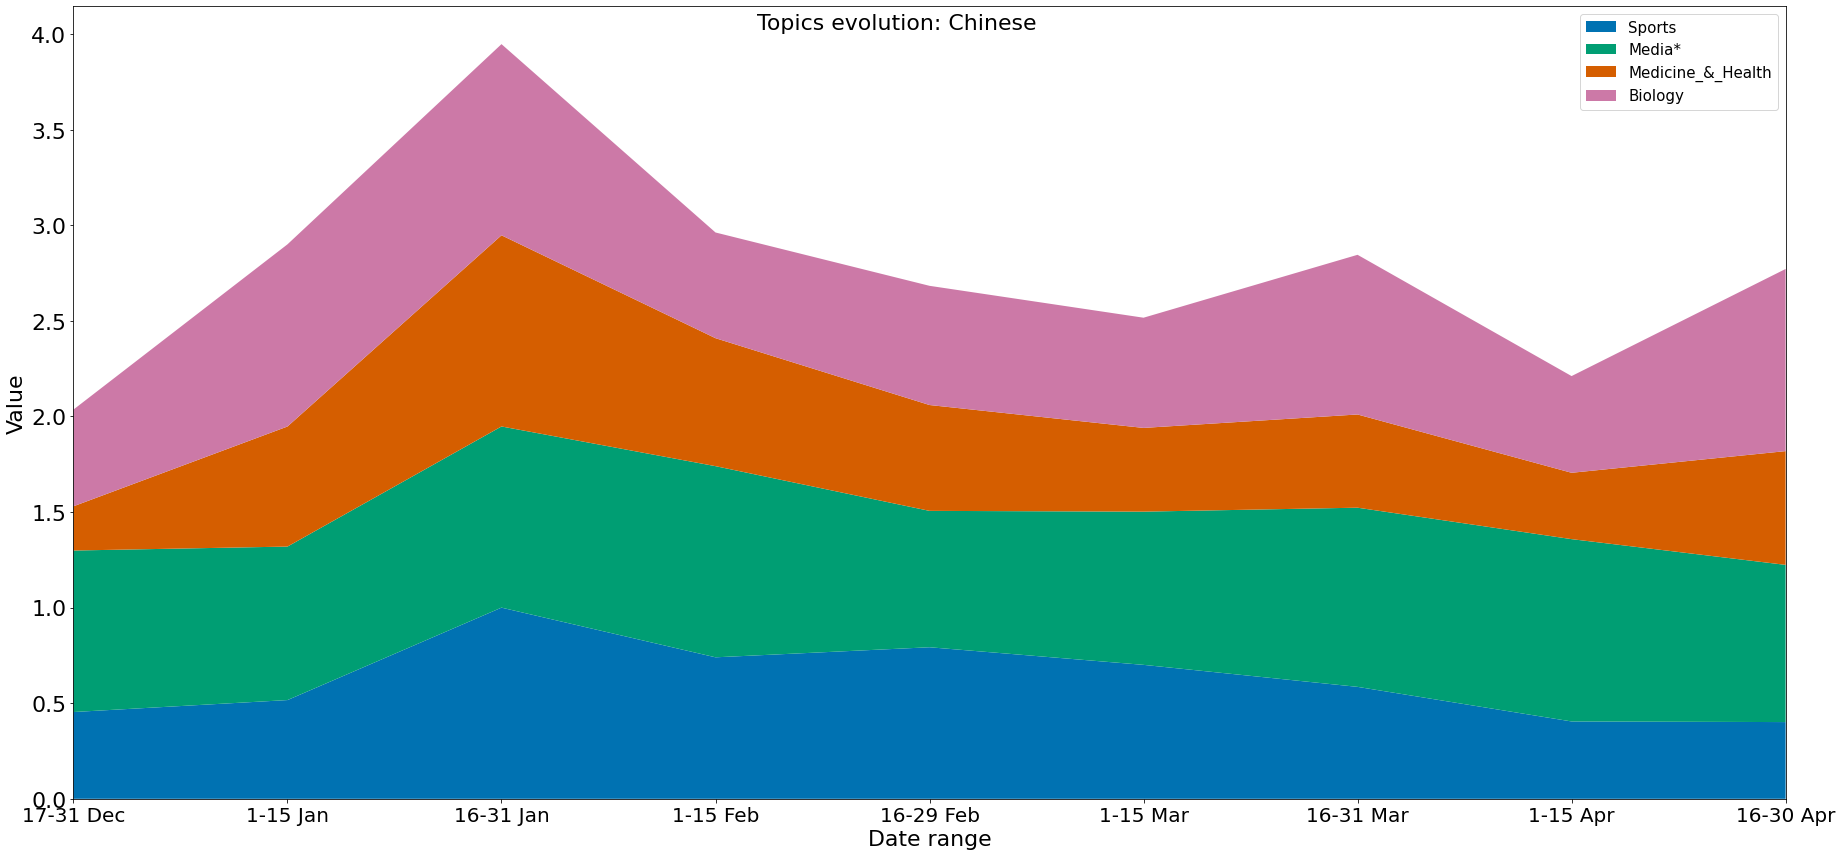

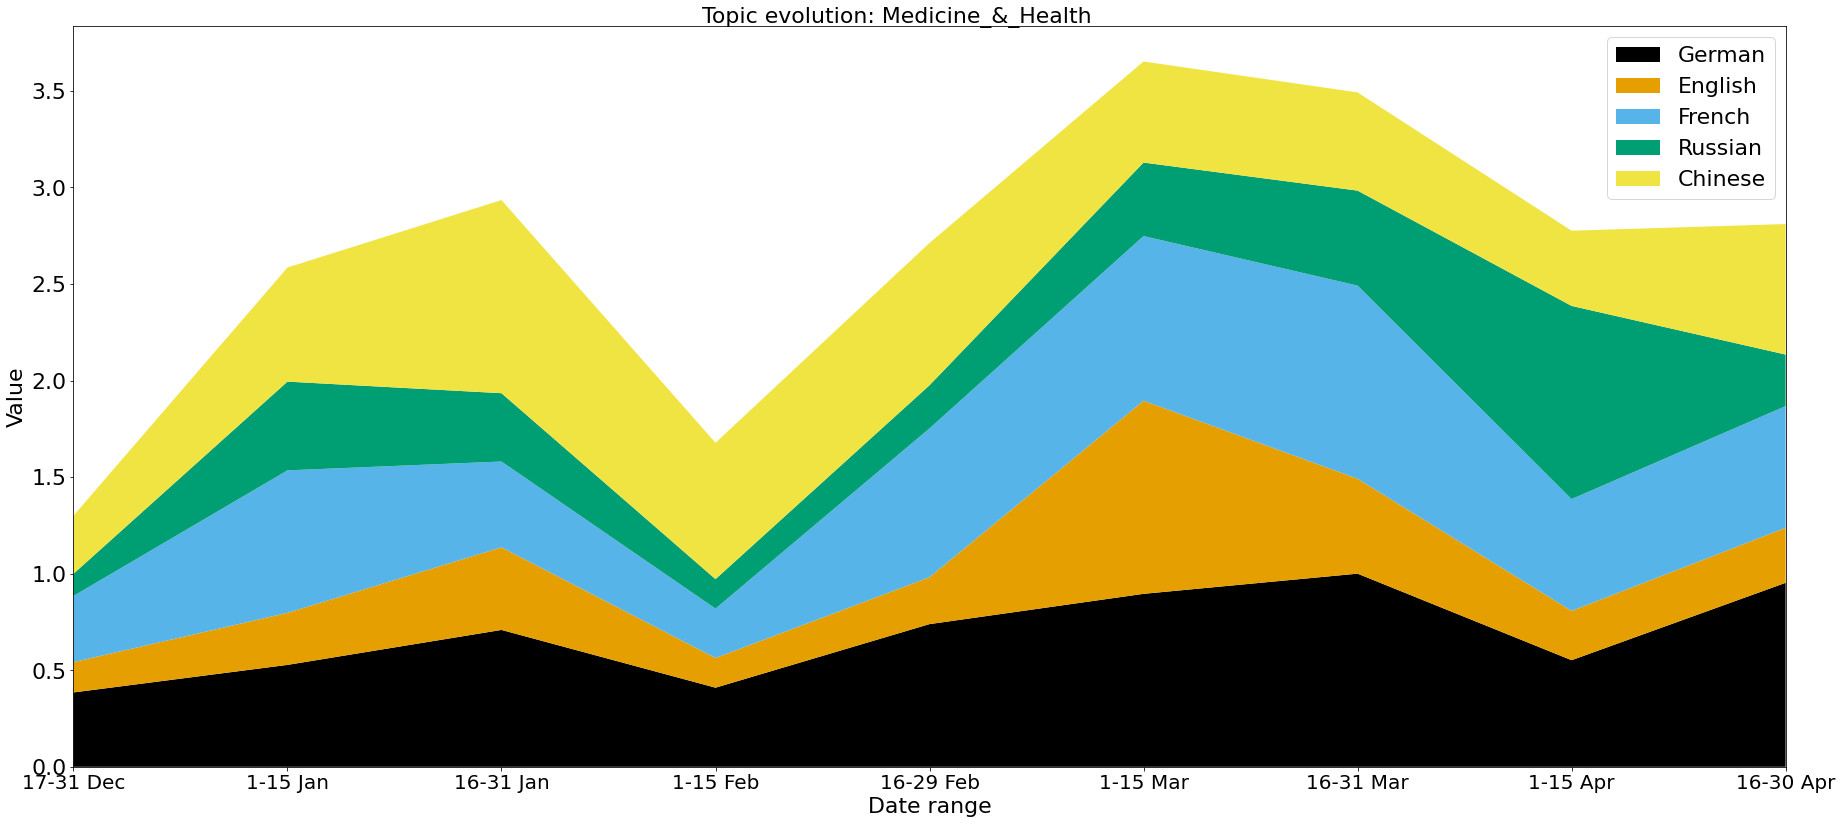

In [8]:



def line_all_topics(list_date, list_topic):
    fig, ax = plt.subplots()
    
#     lst_region = ['DE', 'EN', 'ES', 'FR', 'IT', 'RU', 'ZH']
    lst_region = ['German', 'English', 'Spanish', 'French', 'Italian', 'Russian', 'Chinese']

    
    l_date = list_date.copy()
    for i in range(len(l_date)):
        l_date[i] = l_date[i].replace('_', '\n')
        
    y_topics = []
    for i in range(len(lst_region)):
        y_topics.append(np.zeros((len(list_topic), len(list_date))))
    
    for i in range(len(list_topic)):
        topic = list_topic[i]
        for j in range(len(list_date)):
            date = list_date[j]
            count_de, count_en, count_es, count_fr, count_it, count_ru, count_zh = count_topics(date)
            
            y_topics[0][i][j] = count_de.loc[count_de.index == topic, 'Count'].max()
            y_topics[1][i][j] = count_en.loc[count_en.index == topic, 'Count'].max()
            y_topics[2][i][j] = count_es.loc[count_es.index == topic, 'Count'].max()
            y_topics[3][i][j] = count_fr.loc[count_fr.index == topic, 'Count'].max()
            y_topics[4][i][j] = count_it.loc[count_it.index == topic, 'Count'].max()
            y_topics[5][i][j] = count_ru.loc[count_ru.index == topic, 'Count'].max()
            y_topics[6][i][j] = count_zh.loc[count_zh.index == topic, 'Count'].max()
    
    for k in range(len(lst_region)):
        plt.clf()
           
        for i in range(len(list_topic)):
            y_topics[k][i] = y_topics[k][i] / np.max(y_topics[k][i]) 
            topic = list_topic[i]
            plt.plot(l_date, y_topics[k][i], label=topic, linewidth=3)
    
        fig.suptitle('Topics evolution: '+lst_region[k], fontsize=22)
        plt.xlabel('Date', fontsize=22)
        plt.ylabel('Value', fontsize=22)
        fig.tight_layout()
        plt.legend(fontsize=15)
        fig.savefig("Figures_comparison/topic_lines_"+lst_region[k]+".png", bbox_inches='tight')

        
def line_topic_region(list_date, list_region, topic):
    fig, ax = plt.subplots() 
    
    l_date = list_date.copy()
    for i in range(len(l_date)):
        l_date[i] = l_date[i].replace('_', '\n')
    lst_region = ['DE', 'EN', 'ES', 'FR', 'IT', 'RU', 'ZH']
    dict_region = {'DE':'German', 'EN':'English', 'ES':'Spanish', 'FR':'French', 'IT':'Italian', 'RU':'Russian', 'ZH':'Chinese'}

    y_region = np.zeros((len(list_region), len(list_date)))
    
    for i in range(len(list_date)):
        date = list_date[i]
        count_de, count_en, count_es, count_fr, count_it, count_ru, count_zh = count_topics(date)    
        k = 0
        for region in list_region:
            if (region == 'DE'):
                y_region[k][i] = count_de.loc[count_de.index == topic, 'Ratio'].max()
                k+=1
            if (region == 'EN'):
                y_region[k][i] = count_en.loc[count_en.index == topic, 'Ratio'].max()
                k+=1
            if (region == 'ES'):
                y_region[k][i] = count_es.loc[count_es.index == topic, 'Ratio'].max()
                k+=1
            if (region == 'FR'):
                y_region[k][i] = count_fr.loc[count_fr.index == topic, 'Ratio'].max()
                k+=1
            if (region == 'IT'):
                y_region[k][i] = count_it.loc[count_it.index == topic, 'Ratio'].max()
                k+=1
            if (region == 'RU'):
                y_region[k][i] = count_ru.loc[count_ru.index == topic, 'Ratio'].max()
                k+=1
            if (region == 'ZH'):
                y_region[k][i] = count_zh.loc[count_zh.index == topic, 'Ratio'].max()
                k+=1
        
    for i in range(len(list_region)):
        region = list_region[i]
        y_region[i] = y_region[i] / np.max(y_region[i])
        plt.plot(l_date, y_region[i], label=dict_region[region], linewidth=3)
    
    fig.suptitle('Topic evolution: '+topic, fontsize=22)
    plt.xlabel('Date', fontsize=22)
    plt.ylabel('Value', fontsize=22)
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.legend(fontsize=22)
    fig.savefig("Figures_comparison/lines_"+topic+".png", bbox_inches='tight')

    
    return y_region
    
    

    
# ['#EE7733', '#0077BB', '#33BBEE', '#EE3377', '#CC3311', '#009988', '#BBBBBB']

def stack_topic_region(list_date, list_region, topic):
    fig, ax = plt.subplots() 
    
#     l_date = list_date.copy()
#     for i in range(len(l_date)):
#         l_date[i] = l_date[i].replace('_', '\n')
    l_date = ['17-31 Dec', '1-15 Jan', '16-31 Jan', '1-15 Feb',
             '16-29 Feb', '1-15 Mar', '16-31 Mar','1-15 Apr',
             '16-30 Apr']
    lst_region = ['DE', 'EN', 'ES', 'FR', 'IT', 'RU', 'ZH']
    dict_region = {'DE':'German', 'EN':'English', 'ES':'Spanish', 'FR':'French', 'IT':'Italian', 'RU':'Russian', 'ZH':'Chinese'}

    y_region = np.zeros((len(list_region), len(list_date)))
    
    for i in range(len(list_date)):
        date = list_date[i]
        count_de, count_en, count_es, count_fr, count_it, count_ru, count_zh = count_topics(date)    
        k = 0
        for region in list_region:
            if (region == 'DE'):
                y_region[k][i] = count_de.loc[count_de.index == topic, 'Ratio'].max()
                k+=1
            if (region == 'EN'):
                y_region[k][i] = count_en.loc[count_en.index == topic, 'Ratio'].max()
                k+=1
            if (region == 'ES'):
                y_region[k][i] = count_es.loc[count_es.index == topic, 'Ratio'].max()
                k+=1
            if (region == 'FR'):
                y_region[k][i] = count_fr.loc[count_fr.index == topic, 'Ratio'].max()
                k+=1
            if (region == 'IT'):
                y_region[k][i] = count_it.loc[count_it.index == topic, 'Ratio'].max()
                k+=1
            if (region == 'RU'):
                y_region[k][i] = count_ru.loc[count_ru.index == topic, 'Ratio'].max()
                k+=1
            if (region == 'ZH'):
                y_region[k][i] = count_zh.loc[count_zh.index == topic, 'Ratio'].max()
                k+=1
    labels = []
    evolution = []
    for i in range(len(list_region)):
        region = list_region[i]
        labels.append(dict_region[region])
        y_region[i] = y_region[i] / np.max(y_region[i])
        evolution.append(list(y_region[i]))
#         plt.plot(l_date, y_region[i], label=dict_region[region], linewidth=3)
    
    plt.stackplot(l_date, evolution, labels=labels, colors = ['#000000','#E69F00','#56B4E9','#009E73', '#F0E442', '#0072B2', '#D55E00'])
    
    fig.suptitle('Topic evolution: '+topic, fontsize=22)
    plt.xlabel('Date range', fontsize=22)
    plt.ylabel('Value', fontsize=22)
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.legend(fontsize=22)
    plt.xlim(left=0, right=8)
    fig.savefig("Figures_comparison/lines_"+topic+".png", bbox_inches='tight')

    
    return y_region


def stack_all_topics(list_date, list_topic):
    fig, ax = plt.subplots()
    
#     lst_region = ['DE', 'EN', 'ES', 'FR', 'IT', 'RU', 'ZH']
    lst_region = ['German', 'English', 'Spanish', 'French', 'Italian', 'Russian', 'Chinese']

    
#     l_date = list_date.copy()
#     for i in range(len(l_date)):
#         l_date[i] = l_date[i].replace('_', '\n')

    l_date = ['17-31 Dec', '1-15 Jan', '16-31 Jan', '1-15 Feb',
             '16-29 Feb', '1-15 Mar', '16-31 Mar','1-15 Apr',
             '16-30 Apr']
        
    y_topics = []
    for i in range(len(lst_region)):
        y_topics.append(np.zeros((len(list_topic), len(list_date))))
    
    for i in range(len(list_topic)):
        topic = list_topic[i]
        for j in range(len(list_date)):
            date = list_date[j]
            count_de, count_en, count_es, count_fr, count_it, count_ru, count_zh = count_topics(date)
            
            y_topics[0][i][j] = count_de.loc[count_de.index == topic, 'Count'].max()
            y_topics[1][i][j] = count_en.loc[count_en.index == topic, 'Count'].max()
            y_topics[2][i][j] = count_es.loc[count_es.index == topic, 'Count'].max()
            y_topics[3][i][j] = count_fr.loc[count_fr.index == topic, 'Count'].max()
            y_topics[4][i][j] = count_it.loc[count_it.index == topic, 'Count'].max()
            y_topics[5][i][j] = count_ru.loc[count_ru.index == topic, 'Count'].max()
            y_topics[6][i][j] = count_zh.loc[count_zh.index == topic, 'Count'].max()
    
    for k in range(len(lst_region)):
        plt.clf()
        
        labels = []
        evolution = []
        for i in range(len(list_topic)):
            y_topics[k][i] = y_topics[k][i] / np.max(y_topics[k][i]) 
            topic = list_topic[i]
            labels.append(topic)
            evolution.append(list(y_topics[k][i]))
#             plt.plot(l_date, y_topics[k][i], label=topic, linewidth=3)
#         print(l_date, evolution, labels)
        plt.stackplot(l_date, evolution, labels=labels)
    
        fig.suptitle('Topics evolution: '+lst_region[k], fontsize=22)
        plt.xlabel('Date range', fontsize=22)
        plt.ylabel('Value', fontsize=22)
        fig.tight_layout()
        plt.legend(fontsize=15)
        plt.xlim(left=0, right=8)
        fig.savefig("Figures_comparison/topic_stacked_"+lst_region[k]+".png", bbox_inches='tight')
    
    
    
    
    
    
    
    
    
    
list_region1 = ['DE', 'EN', 'FR', 'RU', 'ZH']
list_region2 = ['ES', 'IT']

list_topic1 = ['Sports', 'Media*', 'Medicine_&_Health', 'Biology']

# line_all_topics(list_date, list_topic1)
# y_region = line_topic_region(list_date, list_region2,'Medicine_&_Health')


stack_all_topics(list_date, list_topic1)
y_region = stack_topic_region(list_date, list_region1,'Medicine_&_Health')